<a href="https://colab.research.google.com/github/Loveena28/TSF_GRIP_Tasks/blob/main/Task_1_PredictionUsingSupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**GRIP : THE SPARKS FOUNDATION** 
## Data Science and Business Analytics
## Task 1 : Prediction using Supervised ML
### By : Loveena Ramchandani
#### In this task, we have to predict the percentage of a student based on the number of study hours. The problem has two variables: number of hours which is the predictor variable and score which is the target variable. This problem can be solved using a simple linear regression model.

### **Importing the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### **Importing the dataset**

In [ ]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

### **Exploring the dataset**

In [ ]:
print(data.shape)                  # The function "shape" returns the shape of an array.
data.head()                        # The head() returns the first five rows of the dataset.

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.describe()                   # The describe() computes the statistics summary of the DataFrame columns.

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.info()                        # The info() function is used to print a concise summary of a DataFrame. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

##### As we can see, there are no null values in the dataset.

### **Plotting ScatterPlot to check the linear relationship among the two variables.**

###### A scatter plot is a chart type that is normally used to observe and visually display the relationship between variables.

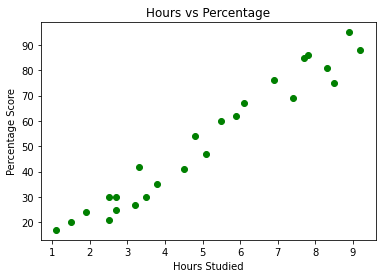

In [ ]:
plt.scatter(data["Hours"],data["Scores"],marker='o',color='green')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [ ]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


##### As we can see that the Pearson correlation coefficient is 0.976191 which is very high. This indicates that there is a strong linear association between Hours and Scores

In [ ]:
hours = data["Hours"]
scores = data["Scores"]

### **Model Building**

In [ ]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

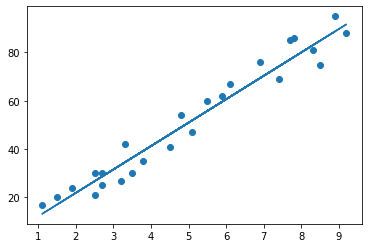

In [ ]:
# Plotting the regression line
line = reg.coef_*x+reg.intercept_

plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [ ]:
y_pred = reg.predict(X_test)
df = pd.DataFrame({"Actual":Y_test,"Predicted":y_pred})
print(df)

   Actual  Predicted
0      20  17.042892
1      27  33.516954
2      69  74.217577
3      30  26.733516
4      62  59.681640
5      35  39.331329
6      24  20.919142
7      86  78.093827
8      76  69.372265


##### **What would be the predicted score if a student studies for 9.25 hours/day?**

In [ ]:
h = 9.25
s = reg.predict([[h]])
print("If a student studies for {} hours a day then he will score {} % in exam".format(h,round(s[0],2)))

If a student studies for 9.25 hours a day then he will score 92.15 % in exam


#### **Model Evaluation** 

In [ ]:
from sklearn import metrics 
from sklearn.metrics import r2_score
print("Mean Absolute Error : ",metrics.mean_absolute_error(Y_test,y_pred))
print("R-squared  : ",r2_score(Y_test,y_pred))
print("Accuracy of the model : {} % ".format(round(reg.score(X_test,Y_test)*100,2)))

Mean Absolute Error :  4.691397441397446
R2 Score :  0.9555700801388128
Accuracy of the model : 95.56 % 
